In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("dirty_cafe_sales.csv")

# data cleaning

In [2]:
df.shape

(10000, 8)

In [3]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


## finding in which we can keep nan by replacing

In [4]:
#replacing all inconsitensis as null
print(df.Item.unique())
print(df.Quantity.unique())
print(df['Price Per Unit'].unique())
print(df['Total Spent'].unique())
print(df['Payment Method'].unique())
print(df['Location'].unique())

['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']
['2' '4' '5' '3' '1' 'ERROR' 'UNKNOWN' nan]
['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 'ERROR' 'UNKNOWN']
['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']
['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]
['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR']


In [5]:
df.replace(['UNKNOWN','ERROR'],np.nan,inplace=True)

In [6]:
print(df.Item.unique())
print(df.Quantity.unique())
print(df['Price Per Unit'].unique())
print(df['Total Spent'].unique())
print(df['Payment Method'].unique())
print(df['Location'].unique())

['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' nan 'Sandwich' 'Juice' 'Tea']
['2' '4' '5' '3' '1' nan]
['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan]
['4.0' '12.0' nan '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' '2.0' '1.0' '7.5' '4.5' '1.5']
['Credit Card' 'Cash' nan 'Digital Wallet']
['Takeaway' 'In-store' nan]


## checking is the syntax is correct for transaction number

In [7]:
def checkin(tem):
    if len(tem)!=11:
        return 1
    else:
        if tem[0]=='T' and tem[1]=='X' and tem[2]=='N' and tem[3]=='_':
            for x in range(4,11):
                if tem[x]>'9' or tem[x]<'0':
                    return 1
                
            return 0
        else:
            return 1
for x in range(10000):
    #print(df.iloc[x])
    if checkin(df.iloc[x]['Transaction ID']) == 1:
        df.iloc[x]['Transaction ID']=np.nan

In [8]:
df.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

## checking whether the dat is valid or not

In [9]:
def checkin2(te):
    if len(te)!=10:
        print(te)
        return 1
    else:
        if te[0]!='2' or te[1]!='0' or te[2]!='2' or te[3]>'3' or te[4]!='-':
            print(te)
            return 1
        if te[5]=='1' and te[6]>'2':
            print(te)
            return 1
        if te[5]>'1':
            print(te)
            return 1
        if te[7]!='-':
            print(te)
            return 1
        if te[8]=='3'and te[9]>'1':
            print(te)
            return 1
        if te[8]>'3':
            print(te)
            return 1;
        return 0
for x in range(10000):
    #print(type(df.iloc[x]['Transaction Date']))
    if pd.notna(df.iloc[x]['Transaction Date']):
        if isinstance(df.iloc[x]['Transaction Date'], str):
            checkin2(df.iloc[x]['Transaction Date'])
        else:
            print(df.iloc[x]['Transaction Date'])

## finding standard price for corresponding item

In [10]:
df.Item.unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', nan, 'Sandwich',
       'Juice', 'Tea'], dtype=object)

In [11]:
dict={}
for x in df.Item.unique():
    if pd.notna(x):
        print(x,end=' ')
        print(df[df['Item']==x]['Price Per Unit'].unique())
        dict[x]=df[df['Item']==x]['Price Per Unit'].unique()[0]

Coffee ['2.0' nan]
Cake ['3.0' nan]
Cookie ['1.0' nan]
Salad ['5.0' nan]
Smoothie ['4.0' nan]
Sandwich ['4.0' nan]
Juice ['3.0' nan]
Tea ['1.5' nan]


## changing datatypes

In [12]:
for x in df.columns:
    df[x]=df[x].astype('string')

In [13]:
df['Price Per Unit']= df['Price Per Unit'].astype('float')
df['Quantity']= df['Quantity'].astype('float')
df['Total Spent']= df['Total Spent'].astype('float')

In [14]:
df.dtypes

Transaction ID      string[python]
Item                string[python]
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method      string[python]
Location            string[python]
Transaction Date    string[python]
dtype: object

## filling price per unit if we know the item

In [15]:
df['Price Per Unit'] = df['Price Per Unit'].fillna(df.groupby('Item')['Price Per Unit'].transform('mean'))

In [16]:
df
print(df.shape)

(10000, 8)


## filling Item name if we know the price 

In [17]:
df[df['Price Per Unit']==2.0].Item='Coffee'
df[df['Price Per Unit']==1.0].Item='Cookie'
df[df['Price Per Unit']==1.5].Item='Tea'
df[df['Price Per Unit']==5.0].Item='Salad'
df

/tmp/ipykernel_5120/2719383526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Price Per Unit']==2.0].Item='Coffee'
/tmp/ipykernel_5120/2719383526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Price Per Unit']==1.0].Item='Cookie'
/tmp/ipykernel_5120/2719383526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,<NA>,<NA>,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,<NA>,<NA>,2023-08-30
9996,TXN_9659401,<NA>,3.0,NaN,3.0,Digital Wallet,<NA>,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,<NA>,2023-03-02
9998,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,<NA>,2023-12-02


## checking are there any duplicates and removing if there any 

In [18]:
df.duplicated().sum()

0

## removing row if it contains nan in item 

In [19]:
df.dropna(subset=['Item'],inplace=True,ignore_index=True)
df
#print(df.shape)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,<NA>,<NA>,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9026,TXN_4766549,Smoothie,2.0,4.0,NaN,Cash,<NA>,2023-10-20
9027,TXN_7672686,Coffee,2.0,2.0,4.0,<NA>,<NA>,2023-08-30
9028,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,<NA>,2023-03-02
9029,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,<NA>,2023-12-02


In [20]:
df['Item'].unique()

<StringArray>
['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'Sandwich', 'Juice', 'Tea']
Length: 8, dtype: string

In [21]:
df.isnull().sum()

Transaction ID         0
Item                   0
Quantity             420
Price Per Unit         0
Total Spent          452
Payment Method      2877
Location            3583
Transaction Date     418
dtype: int64

## removing row if there are both nans in quantity and total spent 

In [22]:
df.dropna(subset=['Quantity','Total Spent'],how='all',inplace=True,ignore_index=True)
df.shape

(9011, 8)

In [23]:
df.isnull().sum()

Transaction ID         0
Item                   0
Quantity             400
Price Per Unit         0
Total Spent          432
Payment Method      2870
Location            3577
Transaction Date     418
dtype: int64

## filling quantity if i know price and spent

In [24]:
def fun(tem):
    #print(tem)
    if pd.notna(tem['Total Spent']):
        res=tem['Total Spent']/tem['Price Per Unit']
        return res
    return tem.Quantity
df['Quantity']=df.apply(lambda y: fun(y),axis=1)
df.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent          432
Payment Method      2870
Location            3577
Transaction Date     418
dtype: int64

## filling spent if i know price and quantity

In [25]:
def fun(tem):
    #print(tem)
    if pd.notna(tem['Quantity']):
        res=tem['Quantity']*tem['Price Per Unit']
        return res
    return tem.Quantity
df['Total Spent']=df.apply(lambda y: fun(y),axis=1)
df.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      2870
Location            3577
Transaction Date     418
dtype: int64

## finding proportions in which payment methods are distributed in each item

In [26]:
for x in df['Item'].unique():
    print(x)
    print(df[df['Item']==x]['Payment Method'].value_counts())
    print(df[df['Item']==x]['Payment Method'].isnull().sum())
    print()

Coffee
Payment Method
Digital Wallet    263
Cash              243
Credit Card       242
Name: count, dtype: Int64
412

Cake
Payment Method
Cash              276
Credit Card       252
Digital Wallet    246
Name: count, dtype: Int64
364

Cookie
Payment Method
Digital Wallet    264
Credit Card       252
Cash              245
Name: count, dtype: Int64
329

Salad
Payment Method
Cash              285
Credit Card       279
Digital Wallet    240
Name: count, dtype: Int64
342

Smoothie
Payment Method
Digital Wallet    254
Credit Card       252
Cash              235
Name: count, dtype: Int64
353

Sandwich
Payment Method
Credit Card       255
Digital Wallet    255
Cash              252
Name: count, dtype: Int64
365

Juice
Payment Method
Digital Wallet    284
Credit Card       276
Cash              265
Name: count, dtype: Int64
343

Tea
Payment Method
Digital Wallet    253
Cash              241
Credit Card       232
Name: count, dtype: Int64
362



## filling nans with same proportion
### because all items have same proportion approximately 33.33% in each method


In [27]:
pay_prop = df['Payment Method'].value_counts(normalize=True)

df.loc[df['Payment Method'].isna(), 'Payment Method'] = np.random.choice(
    pay_prop.index,size=df['Payment Method'].isna().sum(), p=pay_prop.values
)

for x in df['Item'].unique():
    print(x)
    print(df[df['Item']==x]['Payment Method'].value_counts())
    print(df[df['Item']==x]['Payment Method'].isnull().sum())
    print()

Coffee
Payment Method
Digital Wallet    405
Credit Card       383
Cash              372
Name: count, dtype: Int64
0

Cake
Payment Method
Credit Card       387
Cash              385
Digital Wallet    366
Name: count, dtype: Int64
0

Cookie
Payment Method
Cash              367
Digital Wallet    365
Credit Card       358
Name: count, dtype: Int64
0

Salad
Payment Method
Cash              409
Credit Card       386
Digital Wallet    351
Name: count, dtype: Int64
0

Smoothie
Payment Method
Digital Wallet    377
Credit Card       365
Cash              352
Name: count, dtype: Int64
0

Sandwich
Payment Method
Digital Wallet    390
Cash              377
Credit Card       360
Name: count, dtype: Int64
0

Juice
Payment Method
Credit Card       395
Digital Wallet    394
Cash              379
Name: count, dtype: Int64
0

Tea
Payment Method
Digital Wallet    378
Credit Card       360
Cash              350
Name: count, dtype: Int64
0



## finding proportions in which types of location are distributed in each item

In [28]:
for x in df['Item'].unique():
    print(x)
    print(df[df['Item']==x]['Location'].value_counts())
    print(df[df['Item']==x]['Location'].isnull().sum())
    print()

Coffee
Location
Takeaway    350
In-store    318
Name: count, dtype: Int64
492

Cake
Location
Takeaway    343
In-store    321
Name: count, dtype: Int64
474

Cookie
Location
Takeaway    362
In-store    330
Name: count, dtype: Int64
398

Salad
Location
In-store    369
Takeaway    343
Name: count, dtype: Int64
434

Smoothie
Location
In-store    321
Takeaway    303
Name: count, dtype: Int64
470

Sandwich
Location
In-store    368
Takeaway    343
Name: count, dtype: Int64
416

Juice
Location
In-store    361
Takeaway    339
Name: count, dtype: Int64
468

Tea
Location
Takeaway    336
In-store    327
Name: count, dtype: Int64
425



## filling nans with same proportion
### because all items have same proportion approximately 50% in each method

In [29]:
loc_prop = df['Location'].value_counts(normalize=True)

df.loc[df['Location'].isna(), 'Location'] = np.random.choice(
    loc_prop.index,size=df['Location'].isna().sum(), p=loc_prop.values
)

for x in df['Item'].unique():
    print(x)
    print(df[df['Item']==x]['Location'].value_counts())
    print(df[df['Item']==x]['Location'].isnull().sum())
    print()

Coffee
Location
Takeaway    607
In-store    553
Name: count, dtype: Int64
0

Cake
Location
Takeaway    593
In-store    545
Name: count, dtype: Int64
0

Cookie
Location
Takeaway    571
In-store    519
Name: count, dtype: Int64
0

Salad
Location
In-store    587
Takeaway    559
Name: count, dtype: Int64
0

Smoothie
Location
Takeaway    560
In-store    534
Name: count, dtype: Int64
0

Sandwich
Location
In-store    578
Takeaway    549
Name: count, dtype: Int64
0

Juice
Location
In-store    593
Takeaway    575
Name: count, dtype: Int64
0

Tea
Location
In-store    552
Takeaway    536
Name: count, dtype: Int64
0



In [30]:
df.isnull().sum()

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    418
dtype: int64

In [31]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Cash,In-store,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9006,TXN_4766549,Smoothie,2.0,4.0,8.0,Cash,In-store,2023-10-20
9007,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,Takeaway,2023-08-30
9008,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Takeaway,2023-03-02
9009,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,Takeaway,2023-12-02


## filling nans in Transaction date by forward fill
### assuming that the consecutive entries possible to fill at same date rather than other date which comes after some k rows k>10

In [32]:
df['Transaction Date']=df['Transaction Date'].ffill()
df.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

## checking for outliers in numerical data

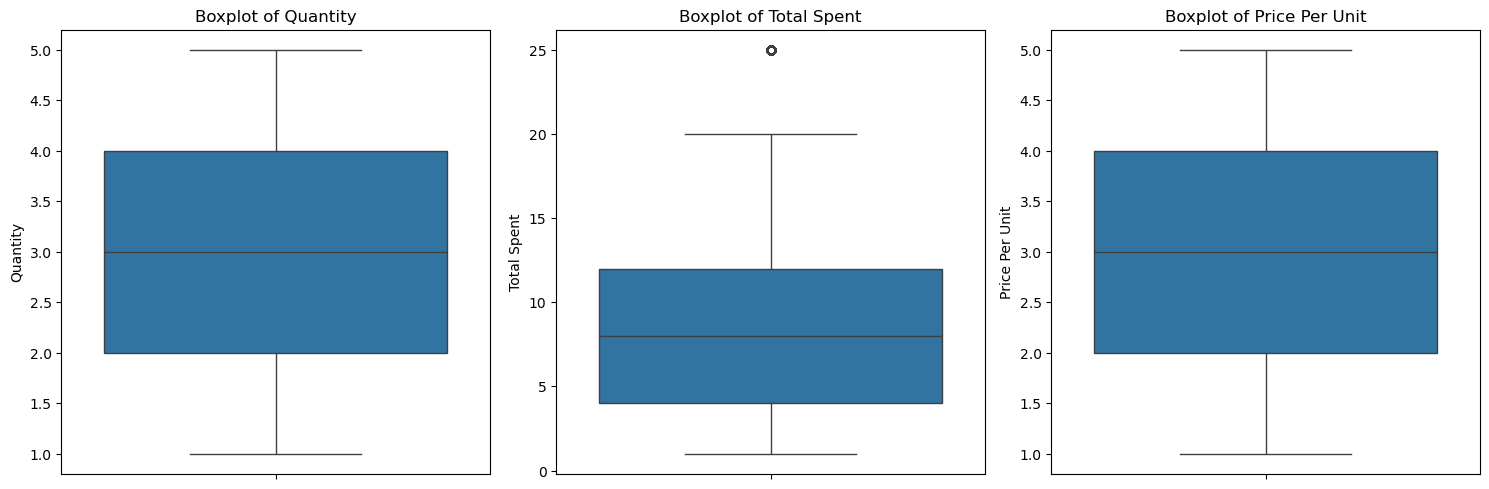

In [33]:
cols=['Quantity','Total Spent','Price Per Unit']
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[cols[i]])
    plt.title(f'Boxplot of {cols[i]}')
plt.tight_layout()
plt.show()


In [34]:
df['Total Spent'].describe()

count    9011.000000
mean        8.943347
std         6.016236
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        25.000000
Name: Total Spent, dtype: float64

## removing outlier present in Total Spent

In [35]:
q1=df['Total Spent'].quantile(0.25)
q3=df['Total Spent'].quantile(0.75)
iqr=q3-q1
l=q1-1.5*iqr
h=q3+1.5*iqr
df=df[(df['Total Spent']<=h) & (df['Total Spent']>=l)]

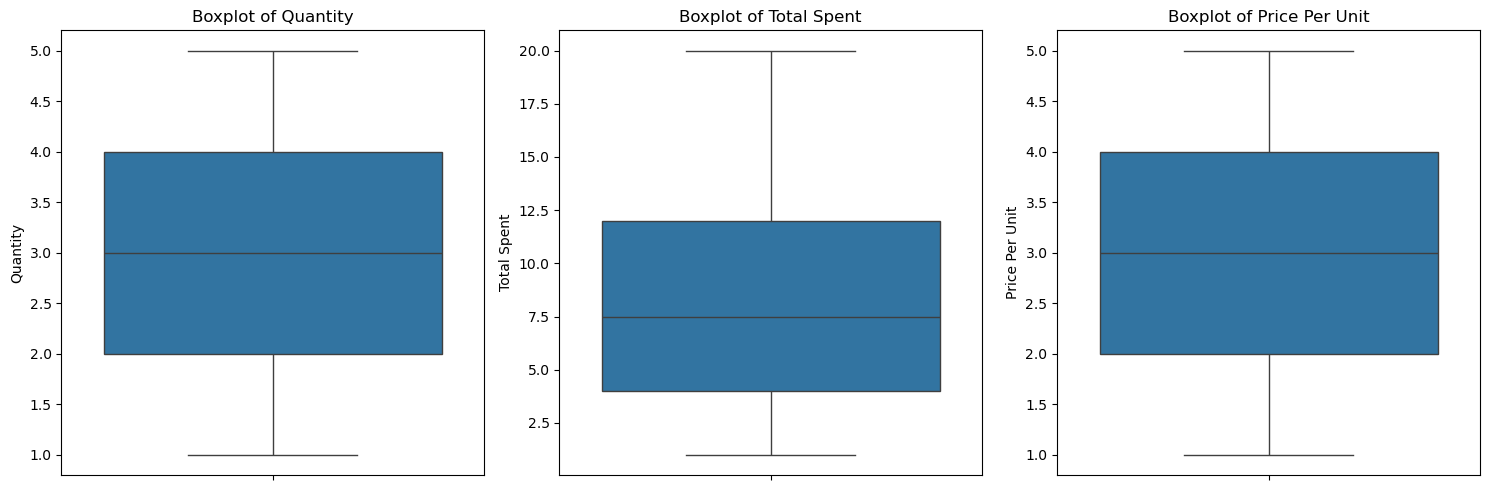

In [36]:
cols=['Quantity','Total Spent','Price Per Unit']
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[cols[i]])
    plt.title(f'Boxplot of {cols[i]}')
plt.tight_layout()
plt.show()

## removing transaction id 
### because it will not affect relations and result in data

In [37]:
df=df.drop(columns=['Transaction ID'])

In [38]:
df

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,Salad,2.0,5.0,10.0,Cash,In-store,2023-04-27
4,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...
9006,Smoothie,2.0,4.0,8.0,Cash,In-store,2023-10-20
9007,Coffee,2.0,2.0,4.0,Digital Wallet,Takeaway,2023-08-30
9008,Coffee,4.0,2.0,8.0,Digital Wallet,Takeaway,2023-03-02
9009,Cookie,3.0,1.0,3.0,Digital Wallet,Takeaway,2023-12-02


## from transaction date finding day and month and removing transaction date from data

In [39]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce') 
df['day']=df['Transaction Date'].dt.day_name()
df['month_name'] = df['Transaction Date'].dt.month_name()

df

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,day,month_name
0,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,Friday,September
1,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,Tuesday,May
2,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,Wednesday,July
3,Salad,2.0,5.0,10.0,Cash,In-store,2023-04-27,Thursday,April
4,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,Sunday,June
...,...,...,...,...,...,...,...,...,...
9006,Smoothie,2.0,4.0,8.0,Cash,In-store,2023-10-20,Friday,October
9007,Coffee,2.0,2.0,4.0,Digital Wallet,Takeaway,2023-08-30,Wednesday,August
9008,Coffee,4.0,2.0,8.0,Digital Wallet,Takeaway,2023-03-02,Thursday,March
9009,Cookie,3.0,1.0,3.0,Digital Wallet,Takeaway,2023-12-02,Saturday,December


In [40]:
df.drop(columns=['Transaction Date'])

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,day,month_name
0,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,Friday,September
1,Cake,4.0,3.0,12.0,Cash,In-store,Tuesday,May
2,Cookie,4.0,1.0,4.0,Credit Card,In-store,Wednesday,July
3,Salad,2.0,5.0,10.0,Cash,In-store,Thursday,April
4,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,Sunday,June
...,...,...,...,...,...,...,...,...
9006,Smoothie,2.0,4.0,8.0,Cash,In-store,Friday,October
9007,Coffee,2.0,2.0,4.0,Digital Wallet,Takeaway,Wednesday,August
9008,Coffee,4.0,2.0,8.0,Digital Wallet,Takeaway,Thursday,March
9009,Cookie,3.0,1.0,3.0,Digital Wallet,Takeaway,Saturday,December


# exploratory data analysis

## univarate analysis

### finding statisctics and drawing box plots and histograms 

count    8763.000000
mean        2.971813
std         1.404010
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Quantity, dtype: float64


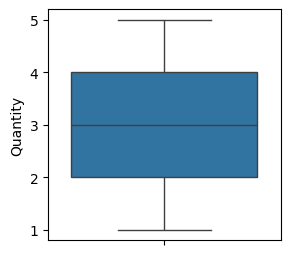

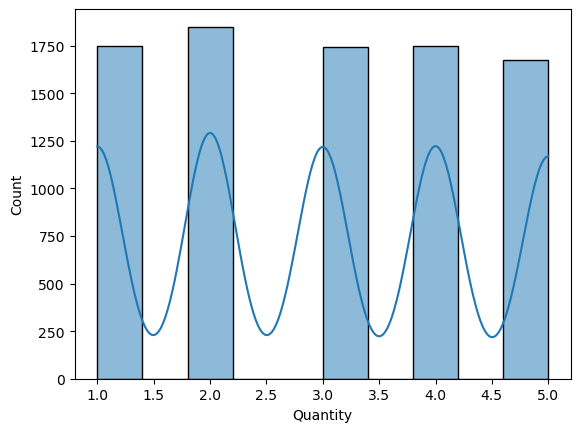

0.031748179041646195

In [76]:
print(df.Quantity.describe())
plt.figure(figsize=(3,3))
sns.boxplot(y=df.Quantity)
plt.show()
sns.histplot(df.Quantity, bins=10,kde=True)
plt.show()
df.Quantity.skew()

count    8763.000000
mean        8.488931
std         5.451221
min         1.000000
25%         4.000000
50%         7.500000
75%        12.000000
max        20.000000
Name: Total Spent, dtype: float64


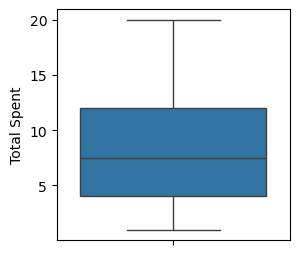

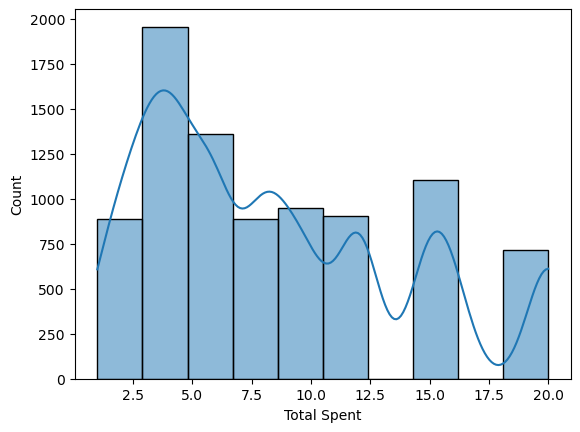

0.6626999005931848

In [77]:
print(df['Total Spent'].describe())
plt.figure(figsize=(3,3))
sns.boxplot(y=df['Total Spent'])
plt.show()
sns.histplot(df['Total Spent'], bins=10,kde=True)
plt.show()
df['Total Spent'].skew()

count    8763.000000
mean        2.891019
std         1.249374
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Price Per Unit, dtype: float64


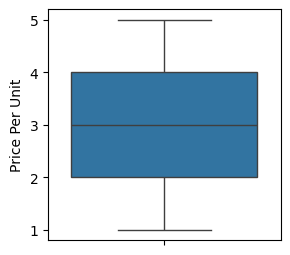

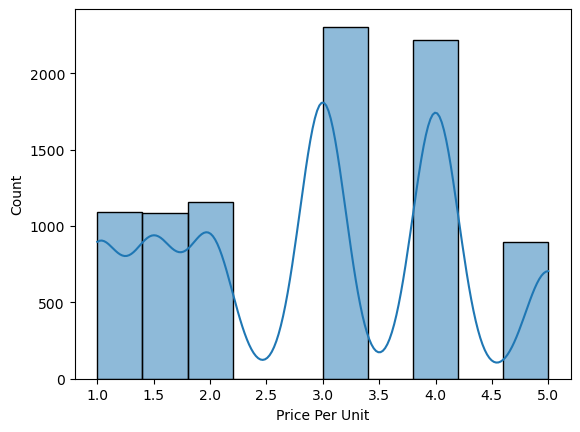

0.019662859686886764

In [78]:
print(df['Price Per Unit'].describe())
plt.figure(figsize=(3,3))
sns.boxplot(y=df['Price Per Unit'])
plt.show()
sns.histplot(df['Price Per Unit'], bins=10,kde=True)
plt.show()
df['Price Per Unit'].skew()

### finding frequency distribution of categorical variables by pie chart

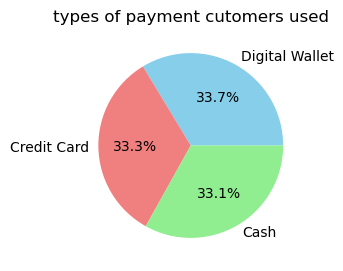

In [44]:
category_counts = df['Payment Method'].value_counts()

plt.figure(figsize=(6,3))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])

plt.title("types of payment cutomers used")
plt.show()

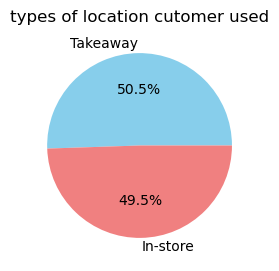

In [45]:
category_counts = df['Location'].value_counts()

plt.figure(figsize=(6,3))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])

plt.title("types of location cutomer used")
plt.show()

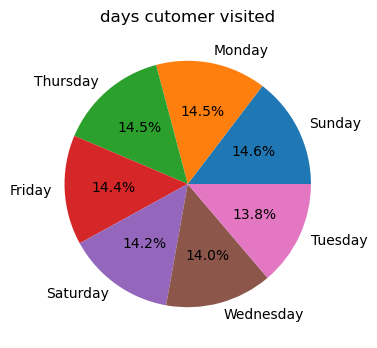

In [46]:
category_counts = df['day'].value_counts()

plt.figure(figsize=(8,4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title("days cutomer visited")
plt.show()

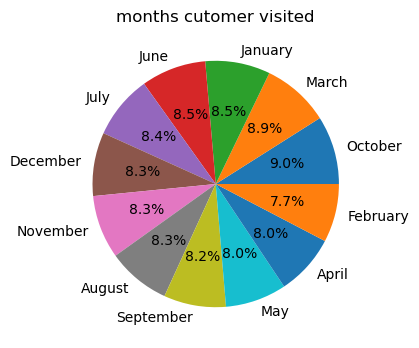

In [47]:
category_counts = df['month_name'].value_counts()

plt.figure(figsize=(8,4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')

plt.title("months cutomer visited")
plt.show()

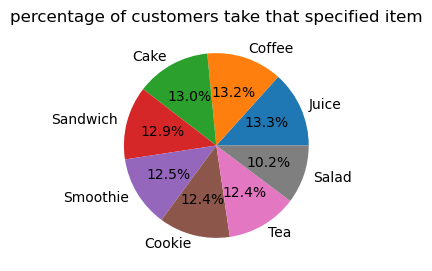

In [48]:
category_counts = df['Item'].value_counts()

plt.figure(figsize=(6,3))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')

plt.title("percentage of customers take that specified item")
plt.show()

## bivarate analysis

### finding correlation matrix 

In [49]:
correlation_matrix = df[['Quantity','Total Spent']].corr()
correlation_matrix

,Quantity,Total Spent
Quantity,1.000000,0.690358
Total Spent,0.690358,1.000000


In [50]:
correlation_matrix = df[['Price Per Unit','Quantity']].corr()
correlation_matrix

,Price Per Unit,Quantity
Price Per Unit,1.000000,-0.058519
Quantity,-0.058519,1.000000


In [51]:
correlation_matrix = df[['Price Per Unit','Total Spent']].corr()
correlation_matrix

,Price Per Unit,Total Spent
Price Per Unit,1.000000,0.611318
Total Spent,0.611318,1.000000


In [52]:
correlation_matrix = df[['Price Per Unit','Total Spent','Quantity']].corr()
correlation_matrix

,Price Per Unit,Total Spent,Quantity
Price Per Unit,1.000000,0.611318,-0.058519
Total Spent,0.611318,1.000000,0.690358
Quantity,-0.058519,0.690358,1.000000


### drawing scatter plot between two numerical variables

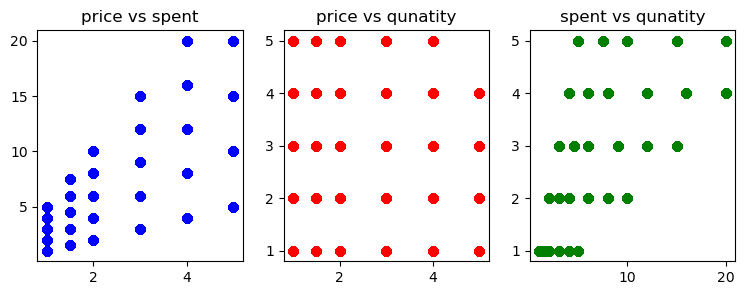

In [53]:
plt.figure(figsize=(9,3))
plt.subplot(1, 3, 1) 
plt.scatter(df['Price Per Unit'],df['Total Spent'],color='blue')
plt.title('price vs spent')
plt.subplot(1, 3, 2) 
plt.scatter(df['Price Per Unit'],df['Quantity'],color='red')
plt.title('price vs qunatity')
plt.subplot(1, 3, 3) 
plt.scatter(df['Total Spent'],df['Quantity'],color='green')
plt.title('spent vs qunatity')
plt.show()

finding no of items sold for each type and amount spent for each type

In [54]:
items=df.Item.unique()
dict={}
for i in range(8):
    dict[items[i]]=i;
value=[0,0,0,0,0,0,0,0]
revenue=[0,0,0,0,0,0,0,0]
print(df.shape)
print(dict)

(8763, 9)
{'Coffee': 0, 'Cake': 1, 'Cookie': 2, 'Salad': 3, 'Smoothie': 4, 'Sandwich': 5, 'Juice': 6, 'Tea': 7}


In [55]:
for x in range(8763):
    value[dict[df.iloc[x]['Item']]]+=df.iloc[x]['Quantity']
    revenue[dict[df.iloc[x]['Item']]]+=df.iloc[x]['Total Spent']
print(value)
print(revenue)

[3536.0, 3468.0, 3232.0, 2229.0, 3336.0, 3429.0, 3505.0, 3307.0]
[7072.0, 10404.0, 3232.0, 11145.0, 13344.0, 13716.0, 10515.0, 4960.5]


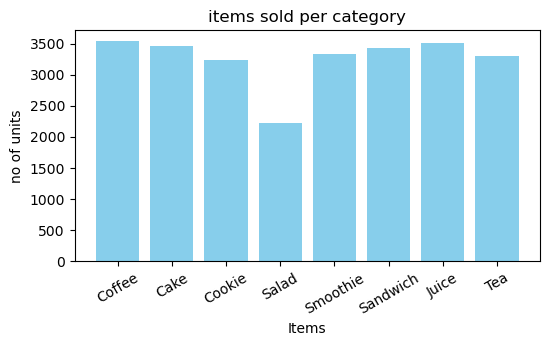

In [56]:
plt.figure(figsize=(6,3))
plt.bar(items,value,color='skyblue')
plt.xlabel('Items')
plt.ylabel('no of units')
plt.xticks(rotation=30)  
plt.title('items sold per category')
plt.show()

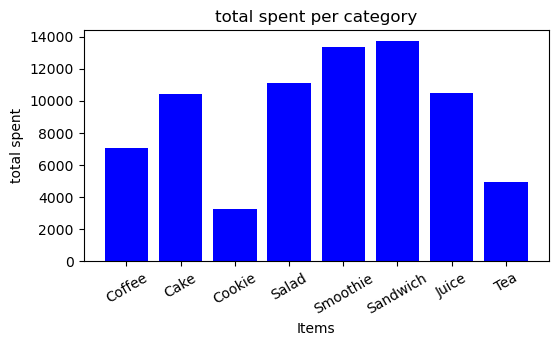

In [57]:
plt.figure(figsize=(6,3))
plt.bar(items,revenue,color='blue')
plt.xlabel('Items')
plt.ylabel('total spent')
plt.xticks(rotation=30)  
plt.title('total spent per category')
plt.show()

### finding amount spent on each item on each month and no of items sold

In [58]:
items=df.day.unique()
items1=df.month_name.unique()
dict1={}
for i in range(7):
    dict1[items[i]]=i
for i in range(12):
    dict1[items1[i]]=i
spentpermonth=[0,0,0,0,0,0,0]
revenue=[0,0,0,0,0,0,0,0,0,0,0,0]
for x in range(8763):
    spentpermonth[dict1[df.iloc[x]['day']]]+=df.iloc[x]['Total Spent']
    revenue[dict1[df.iloc[x]['month_name']]]+=df.iloc[x]['Total Spent']

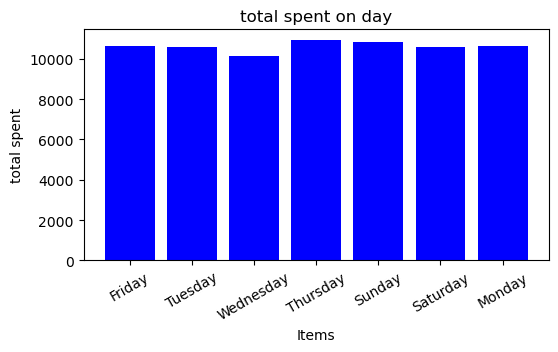

In [59]:
plt.figure(figsize=(6,3))
plt.bar(items,spentpermonth,color='blue')
plt.xlabel('Items')
plt.ylabel('total spent')
plt.xticks(rotation=30)  
plt.title('total spent on day')
plt.show()

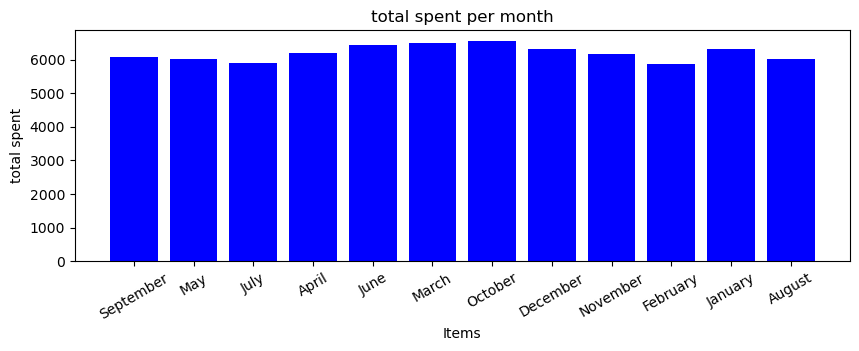

In [60]:
plt.figure(figsize=(10,3))
plt.bar(items1,revenue,color='blue')
plt.xlabel('Items')
plt.ylabel('total spent')
plt.xticks(rotation=30)  
plt.title('total spent per month')
plt.show()

### violin plots

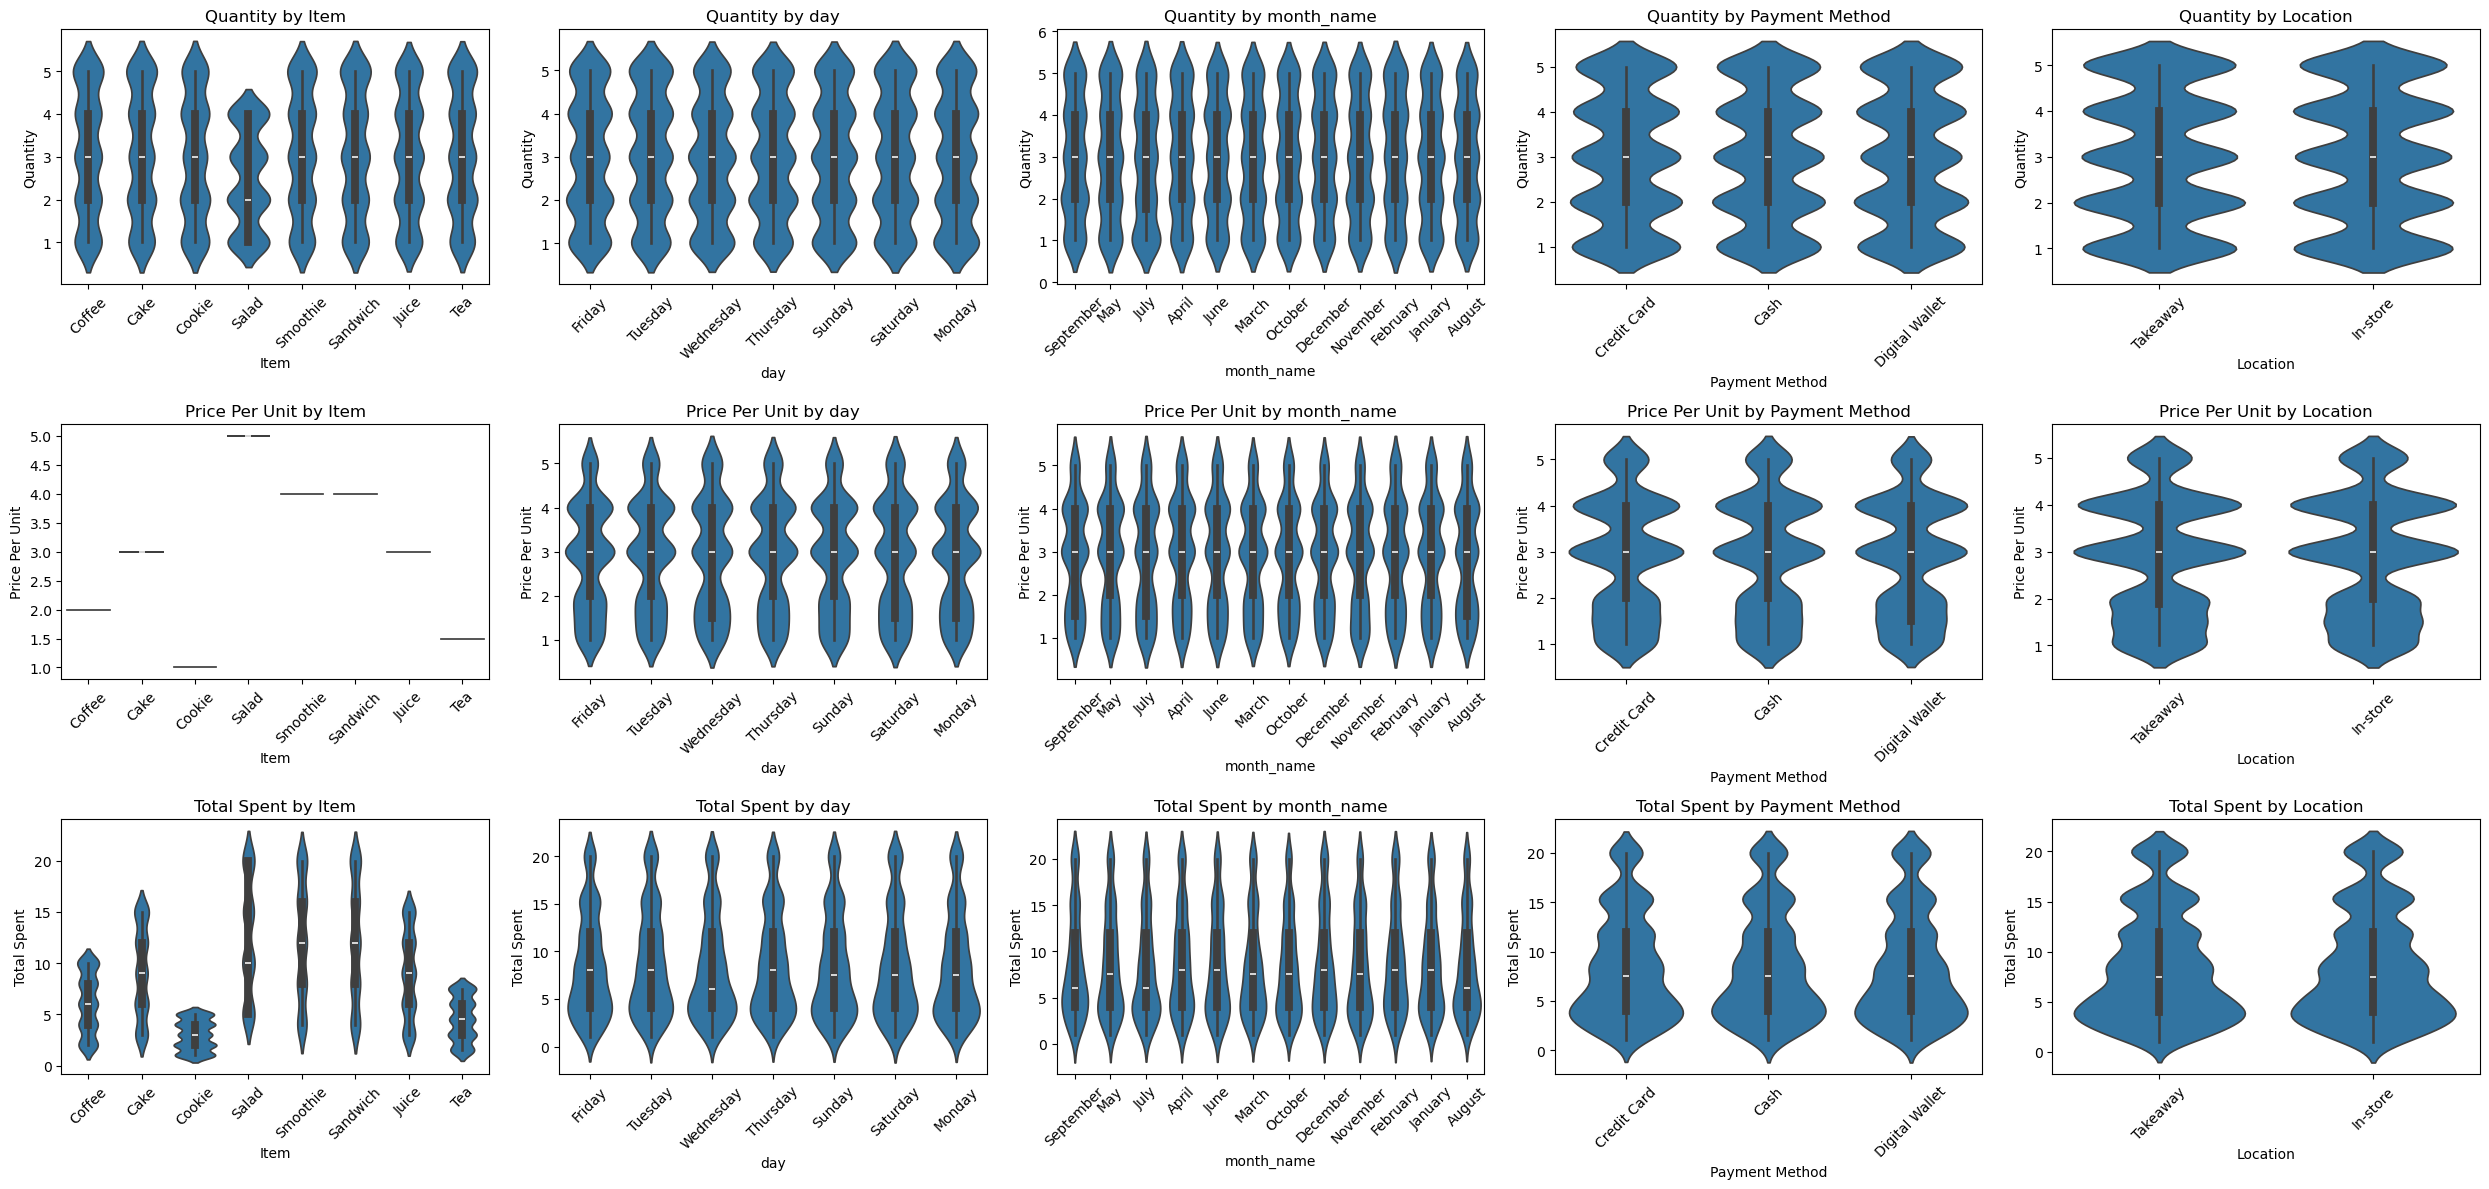

In [61]:
num_cols = ["Quantity","Price Per Unit","Total Spent"]
cat_cols = ["Item", "day","month_name","Payment Method","Location"]

fig, axes = plt.subplots(len(num_cols), len(cat_cols), figsize=(5 * len(cat_cols), 4 * len(num_cols)))
for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        sns.violinplot(x=df[cat], y=df[num], ax=axes[i, j])
        axes[i, j].set_title(f"{num} by {cat}")
        axes[i, j].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

### box plots

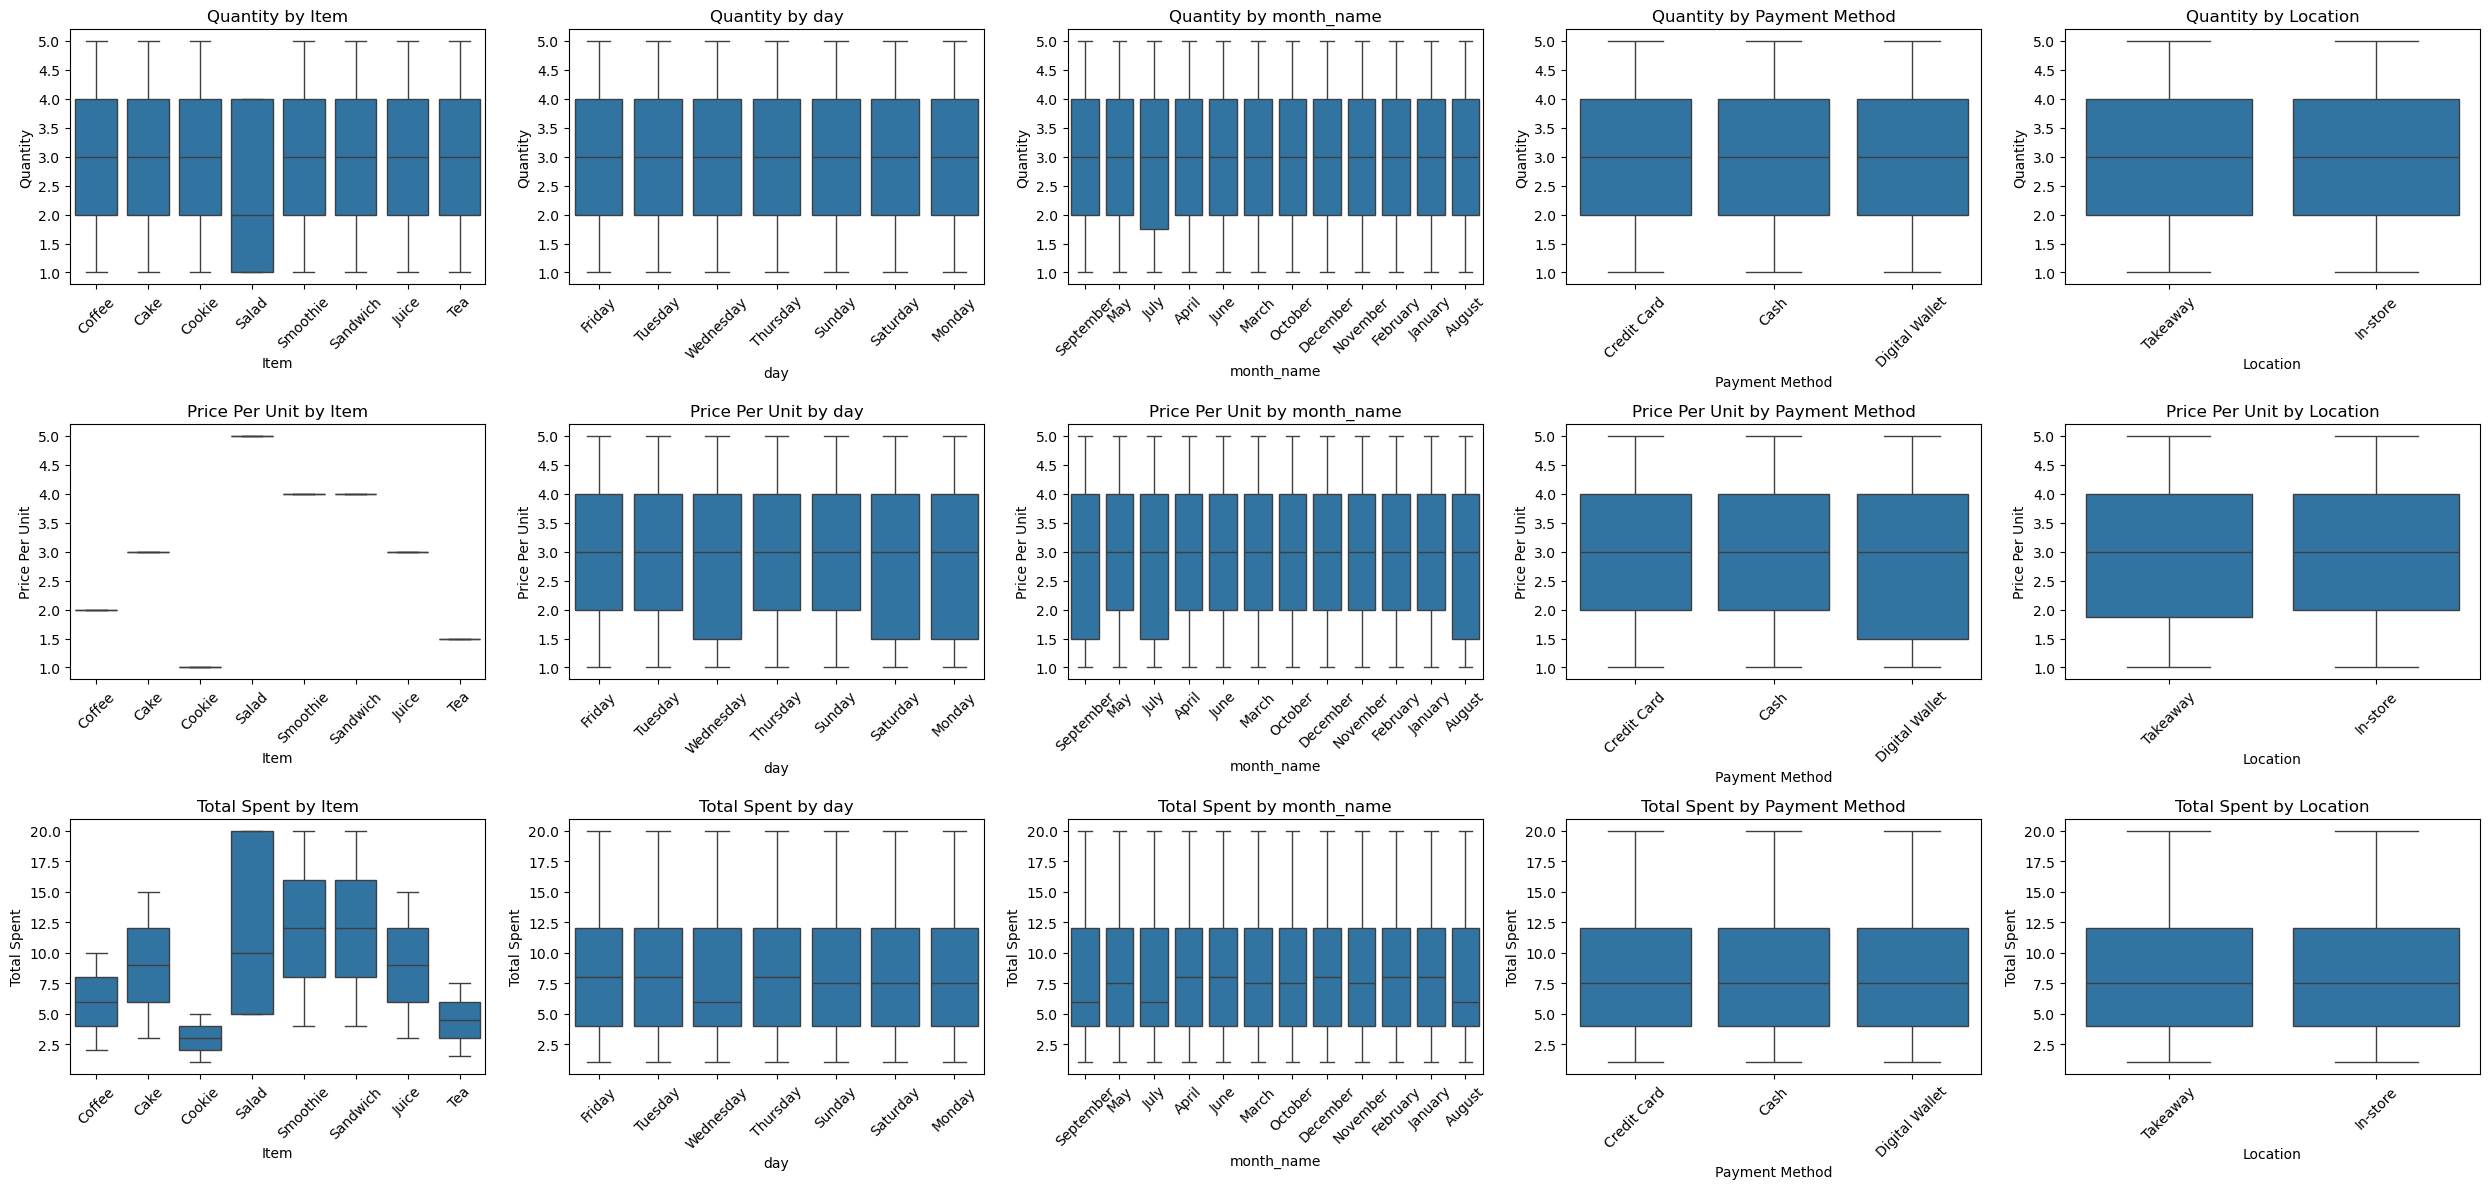

In [62]:
fig, axes = plt.subplots(len(num_cols), len(cat_cols), figsize=(5 * len(cat_cols), 4 * len(num_cols)))
for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        sns.boxplot(x=df[cat], y=df[num], ax=axes[i, j])
        axes[i, j].set_title(f"{num} by {cat}")
        axes[i, j].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

### bar graphs

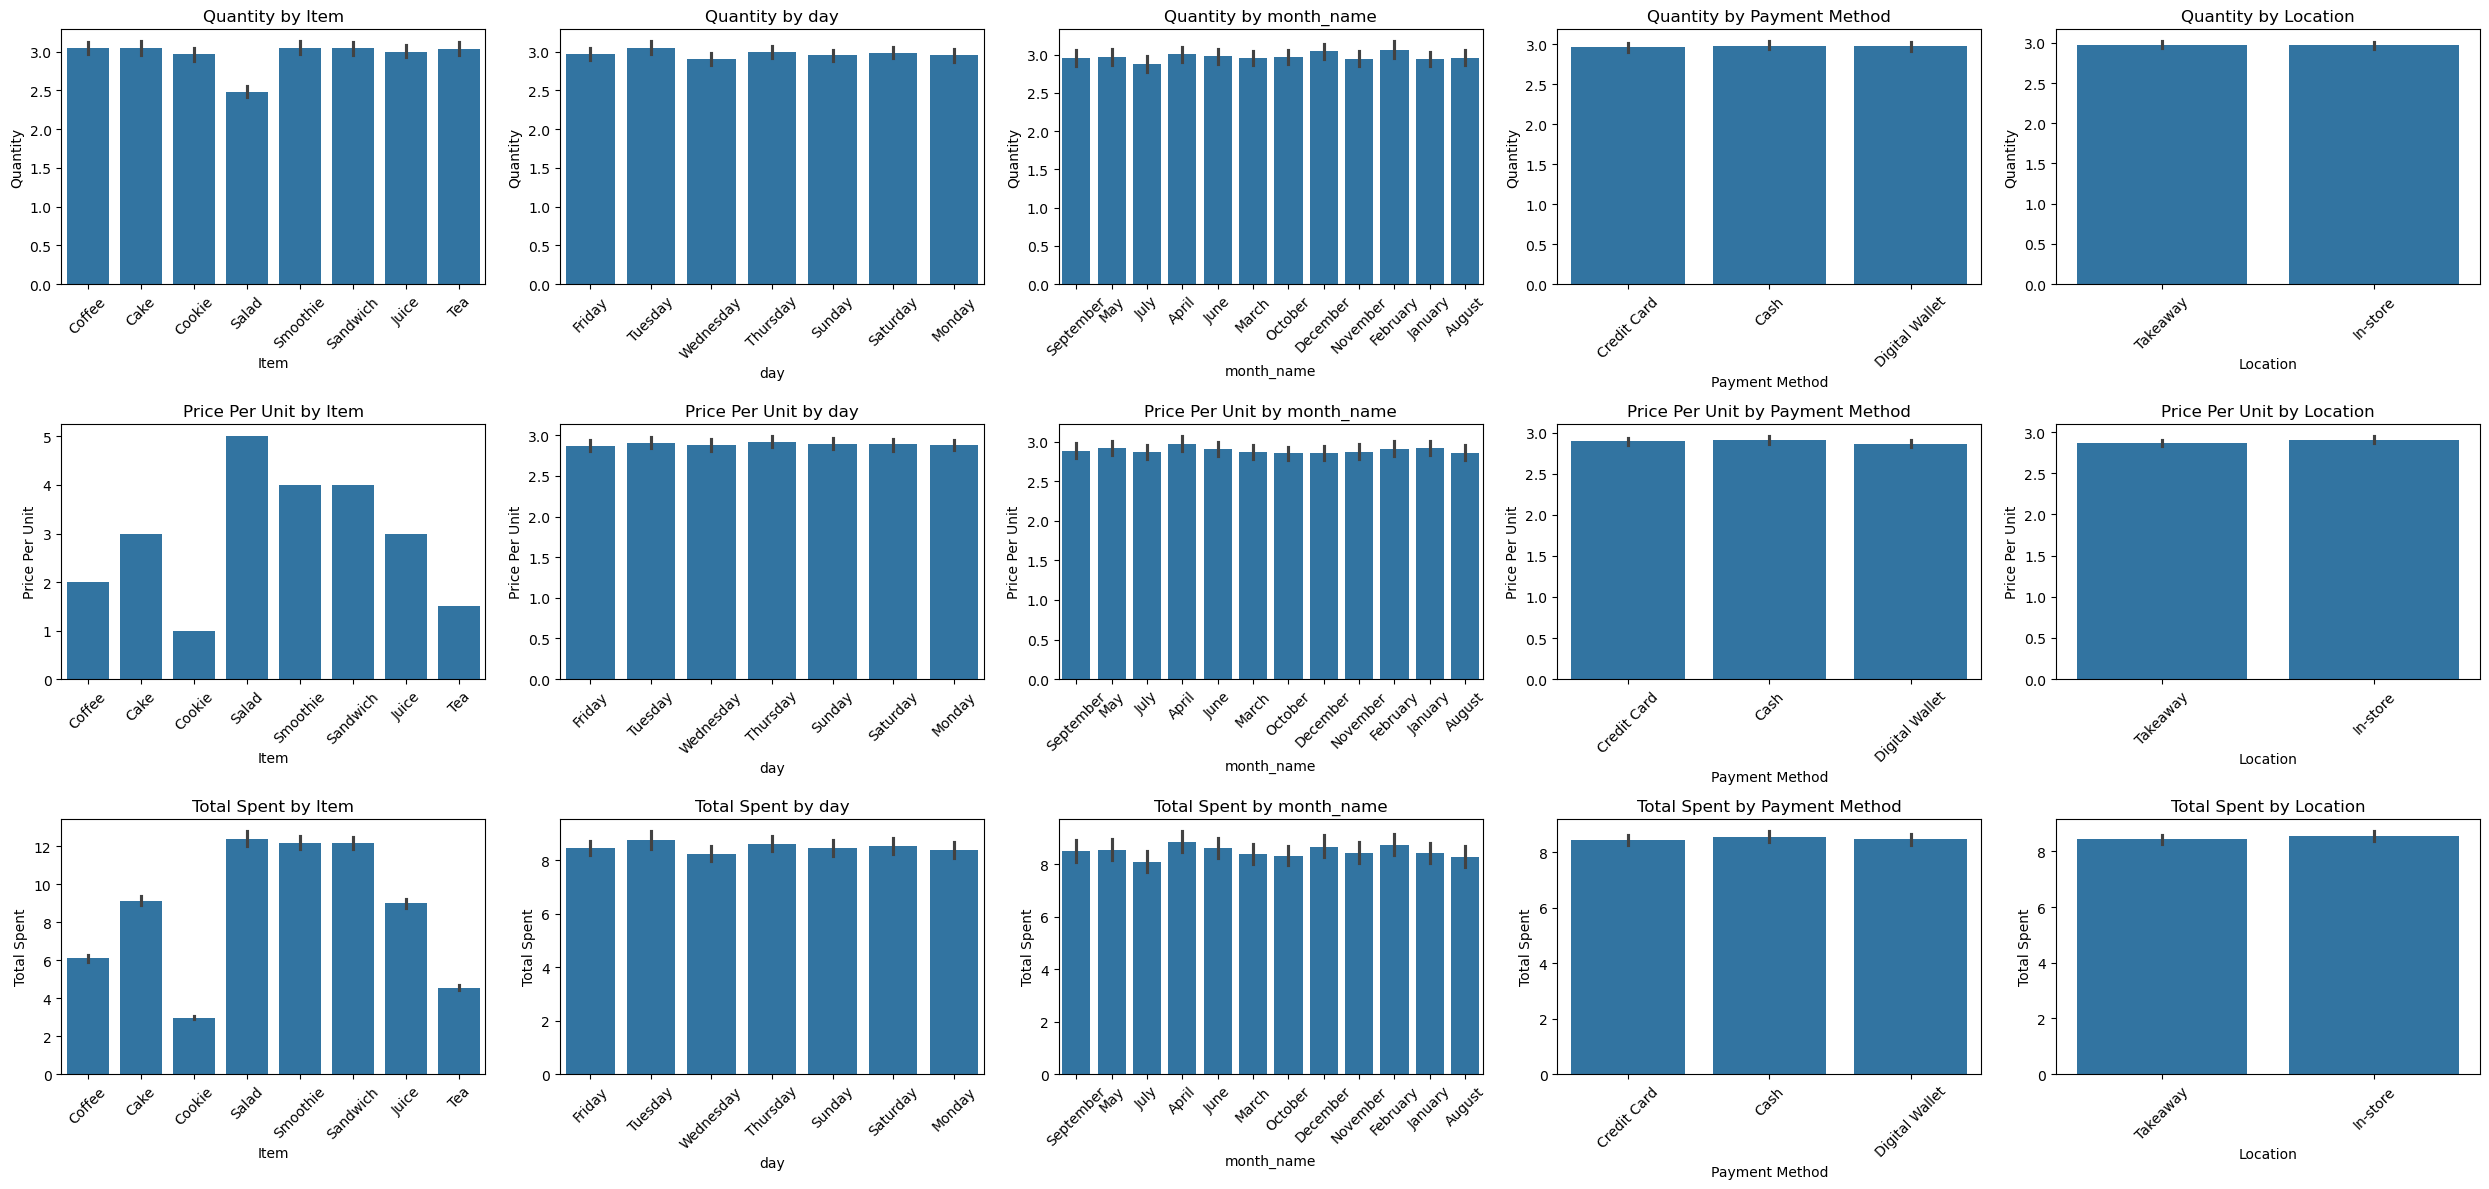

In [63]:
fig, axes = plt.subplots(len(num_cols), len(cat_cols), figsize=(5 * len(cat_cols), 4 * len(num_cols)))
for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        sns.barplot(x=df[cat], y=df[num], ax=axes[i, j])
        axes[i, j].set_title(f"{num} by {cat}")
        axes[i, j].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

## multivarate analysis

### scatter plots

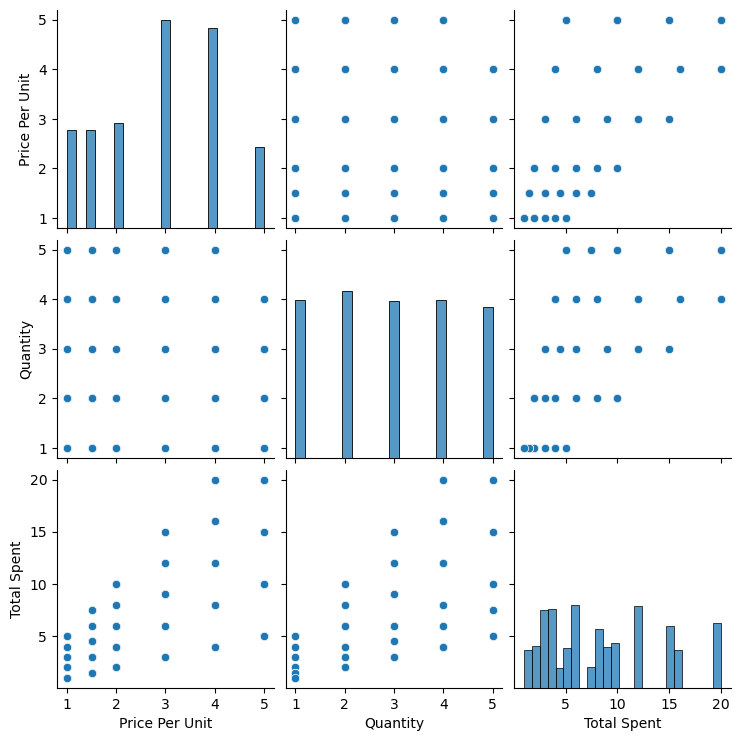

In [64]:
df1 = sns.load_dataset("iris")
selected_cols = ["Price Per Unit", "Quantity", "Total Spent"]
sns.pairplot(df[selected_cols])  
plt.show()

### heatmaps

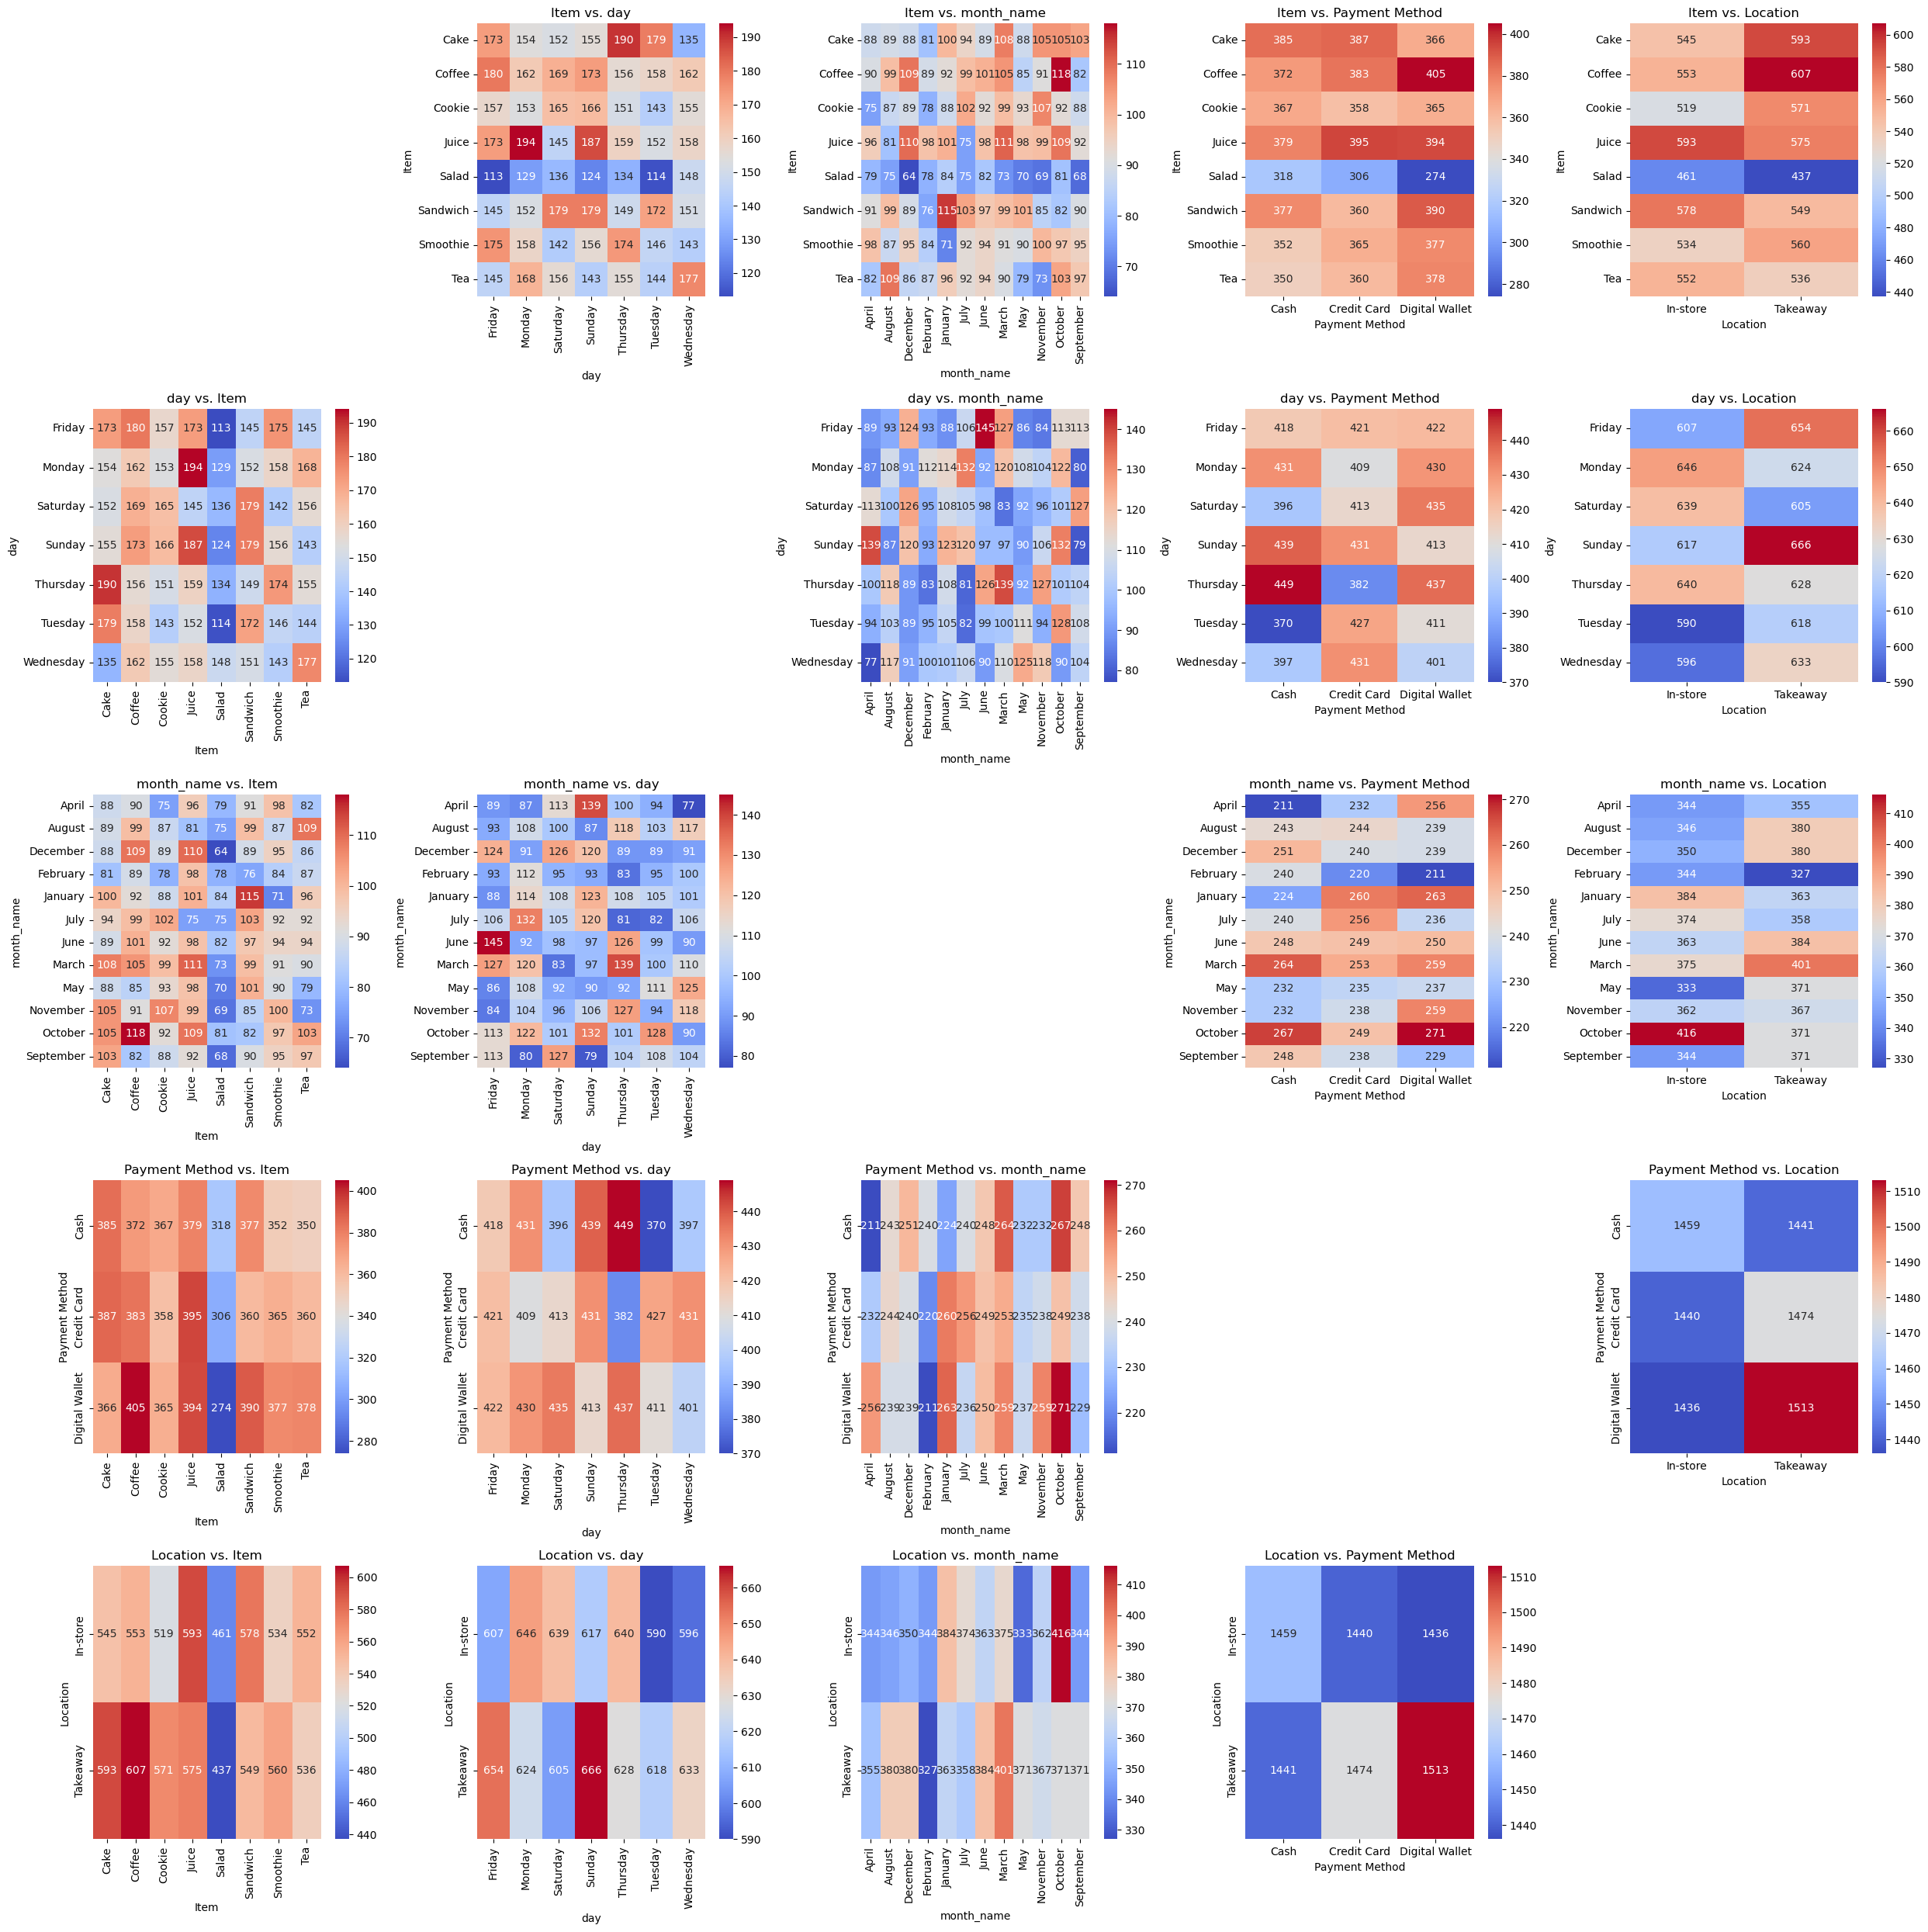

In [65]:
fig, axes = plt.subplots(len(cat_cols), len(cat_cols), figsize=(5 * len(cat_cols), 5 * len(cat_cols)))
for i, cat1 in enumerate(cat_cols):
    for j, cat2 in enumerate(cat_cols):
        if i != j:
            cross_tab = pd.crosstab(df[cat1], df[cat2])
            sns.heatmap(cross_tab, annot=True, cmap="coolwarm", fmt="d", ax=axes[i, j])
            axes[i, j].set_title(f"{cat1} vs. {cat2}")
        else:
            axes[i, j].axis("off")
plt.tight_layout()
plt.show()

### grouped comparisons

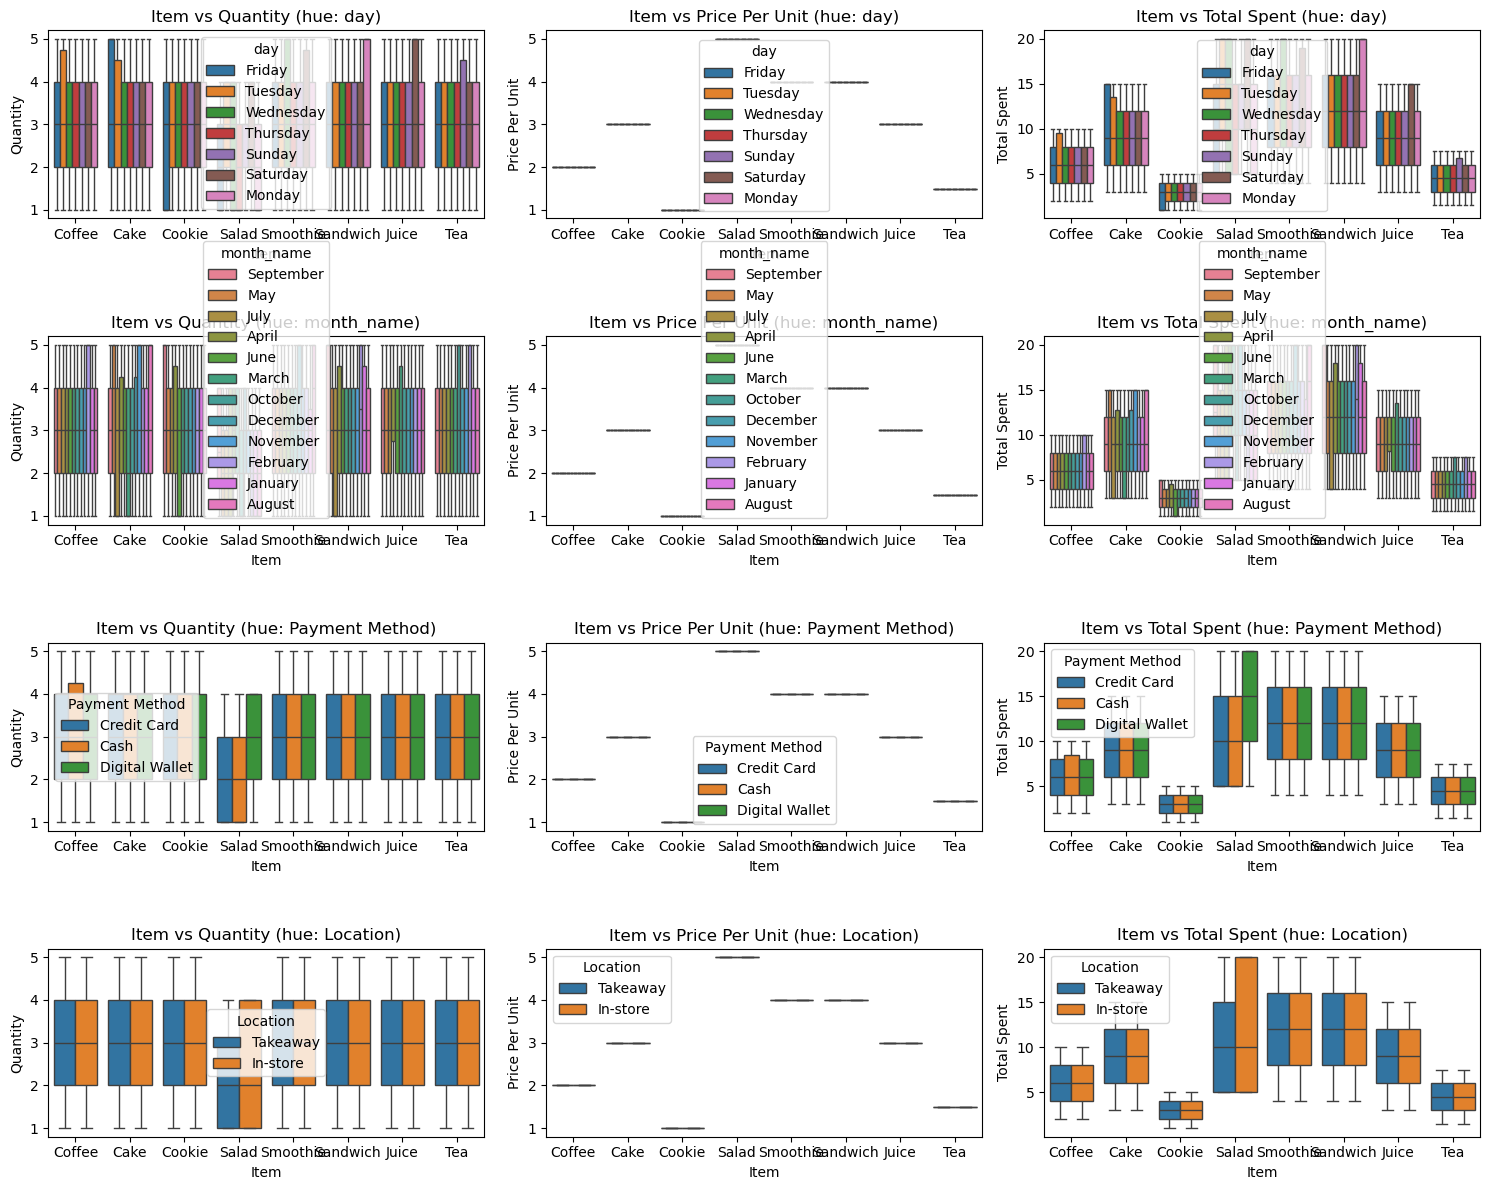

In [74]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))  
for i in range(4):
    for j in range(3):
        ax = axes[i, j]
        sns.boxplot(data=df, x='Item', y=num_cols[j], hue=cat_cols[i+1], ax=ax)  
        ax.set_title(f'Item vs {num_cols[j]} (hue: {cat_cols[i+1]})')
plt.tight_layout()  
plt.show()